In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\Users\GökçeKoray\Desktop\kodlasam\blok4 phyton\proje_ga\asset-v1_Kodlasam+MS01+2023_06+type@asset+block@nobel.csv")

df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


In [55]:
print(df.dtypes)

year                     int64
category                object
prize                   object
motivation              object
prize_share             object
laureate_id              int64
laureate_type           object
full_name               object
birth_date              object
birth_city              object
birth_country           object
sex                     object
organization_name       object
organization_city       object
organization_country    object
death_date              object
death_city              object
death_country           object
dtype: object


In [56]:
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

# **1. Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.**

In [57]:
top_10_countries = df.birth_country.value_counts().reset_index(name='prize_count').head(10)

top_10_countries.index = range(1, len(top_10_countries)+1)

print(top_10_countries)

               birth_country  prize_count
1   United States of America          259
2             United Kingdom           85
3                    Germany           61
4                     France           51
5                     Sweden           29
6                      Japan           24
7                     Canada           18
8                Netherlands           18
9                      Italy           17
10                    Russia           17


# **2. Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.**

In [58]:
#öncelikle kaç kategori olduğunu belirledim.
unique_categories = df.category.unique()
print(unique_categories) 


['Chemistry' 'Literature' 'Medicine' 'Peace' 'Physics' 'Economics']


In [60]:
# Kategorileri belirlediklten sonra her kategoride ödül alan ilk kadınları belirledim

female_prizewinner = df[df.sex == 'Female'].sort_values(by='year').drop_duplicates(subset='category').reset_index()

first_female_prizewinners_list = female_prizewinner[['year', 'category', 'full_name']]
print(first_female_prizewinners_list) 

   year    category                                          full_name
0  1903     Physics                        Marie Curie, née Sklodowska
1  1905       Peace  Baroness Bertha Sophie Felicita von Suttner, n...
2  1909  Literature                      Selma Ottilia Lovisa Lagerlöf
3  1911   Chemistry                        Marie Curie, née Sklodowska
4  1947    Medicine                    Gerty Theresa Cori, née Radnitz
5  2009   Economics                                      Elinor Ostrom


# **3.Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.**

In [61]:
male_prizewinner = df[df.sex == 'Male'].sort_values(by='year').drop_duplicates(subset='category').reset_index()

first_male_prizewinners_list = male_prizewinner[['year', 'category', 'full_name']]
print(first_male_prizewinners_list) 


   year    category                     full_name
0  1901   Chemistry  Jacobus Henricus van 't Hoff
1  1901  Literature               Sully Prudhomme
2  1901    Medicine        Emil Adolf von Behring
3  1901       Peace             Jean Henry Dunant
4  1901     Physics        Wilhelm Conrad Röntgen
5  1969   Economics                 Ragnar Frisch


# **4.Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?**


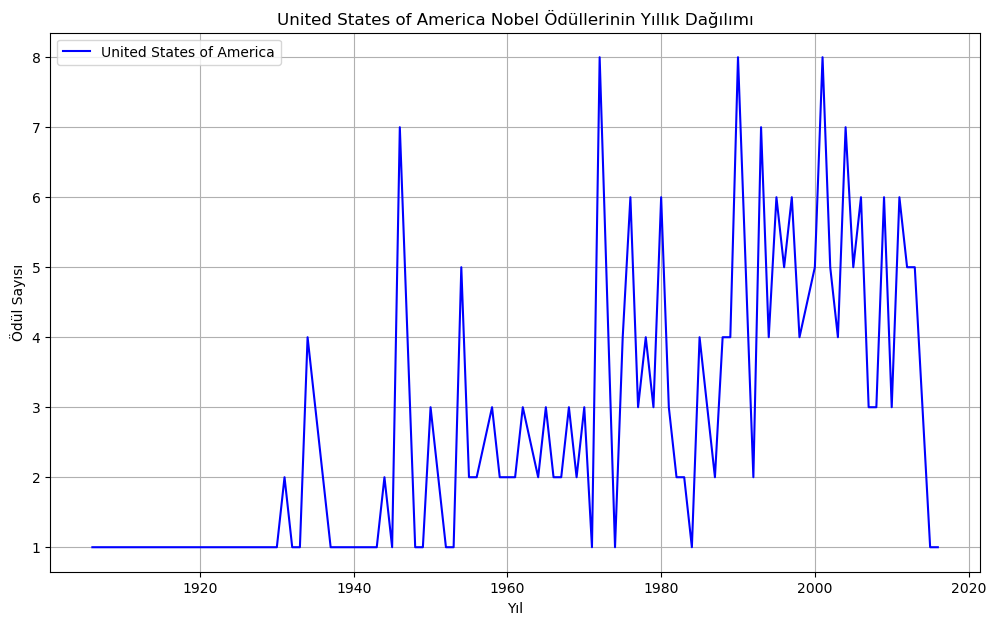

In [67]:
# United States of America en çok ödül kazanan ülke olarak belirlemiştik

country_years = df[df.birth_country == 'United States of America'].groupby('year').size().reset_index(name='prize_count')

plt.figure(figsize=(12, 7))
plt.plot(country_years['year'], country_years['prize_count'], label='United States of America', color='b')

plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.title('United States of America Nobel Ödüllerinin Yıllık Dağılımı')
plt.legend()
plt.grid(True)
plt.show()

ABD'nin Hakimiyeti: 20. yüzyılın ortalarından itibaren özellikle İkinci Dünya Savaşı sonrası dönemde ABD, Nobel ödüllerinde büyük bir hakimiyet kurmuştur. Bu dönemde ABD'nin bilimsel araştırma yatırımlarını artırması, dünya çapında yetenekli bilim insanlarını çekmesi ve üniversitelerinin dünya çapında tanınması bu başarının temel nedenleri arasında sayılabilir.

Soğuk Savaş Etkisi: Soğuk Savaş döneminde ABD ve Sovyetler Birliği arasındaki rekabet, bilim ve teknoloji alanındaki ilerlemelere de yansımış, ABD'nin bu alanda liderliğini pekiştirmesine neden olmuştur.

Bilimsel ve Teknolojik İlerlemeler: ABD'nin araştırma ve geliştirmeye yaptığı yatırımlar, büyük üniversiteler ve araştırma merkezleri (örneğin, MIT, Harvard, NASA) gibi kuruluşların öncü rol oynaması, Nobel ödüllerinde ABD'nin hakimiyet kurmasını sağlayan başlıca faktörlerdir.

Beyin Göçü: Özellikle Avrupa'dan ABD'ye yaşanan büyük beyin göçü, Nobel ödüllerinde ABD'nin liderliğini güçlendirmiştir. Bu süreçte birçok Avrupalı bilim insanı ABD'deki üniversitelere ve araştırma merkezlerine katılmıştır.

# **5. Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.**


In [68]:
df['year_dt'] = pd.to_datetime(df['year'], format='%Y')

df['birth_date_dt'] = df['birth_date'].apply(lambda x: x.split('-')[0] if pd.notna(x) else np.nan)

df['birth_date_dt'] = pd.to_datetime(df['birth_date_dt'], errors='coerce')

# ödül alınan yaşı hesaplama
df['age_at_award'] = (df['year_dt'] - df['birth_date_dt']).dt.days // 365

print(df)

     year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
906  2016    Medicine  The Nobel Prize in Physiology or Medicine 2016   
907  2016       Peace                      The Nobel Peace Prize 2016   
908  2016     Physics                 The Nobel Prize in Physics 2016   
909  2016     Physics                 The Nobel Prize in Physics 2016   
910  2016     Physics                 The Nobel Prize in Physics 2016   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ..

In [19]:
print(df.dtypes)

year                             int64
category                        object
prize                           object
motivation                      object
prize_share                     object
laureate_id                      int64
laureate_type                   object
full_name                       object
birth_date                      object
birth_city                      object
birth_country                   object
sex                             object
organization_name               object
organization_city               object
organization_country            object
death_date                      object
death_city                      object
death_country                   object
year_dt                 datetime64[ns]
birth_date_dt           datetime64[ns]
age_at_award                   float64
dtype: object


In [69]:
# Kategoriye göre cinsiyet dağılımı
pivot_gender_category = pd.pivot_table(df, values='birth_date', index='category', columns='sex', aggfunc='count')
print(pivot_gender_category)

# Kategoriye göre ödül aldıkları yaş ortalamaları
pivot_age_category = pd.pivot_table(df, values='age_at_award', index=['category','sex'], aggfunc='mean')
print(pivot_age_category)


sex         Female  Male
category                
Chemistry        4   170
Economics        1    77
Literature      14    99
Medicine        12   199
Peace           16    88
Physics          2   201
                   age_at_award
category   sex                 
Chemistry  Female     51.500000
           Male       58.194118
Economics  Female     76.000000
           Male       66.961039
Literature Female     63.071429
           Male       64.898990
Medicine   Female     62.583333
           Male       57.693467
Peace      Female     52.062500
           Male       63.090909
Physics    Female     46.500000
           Male       55.462687


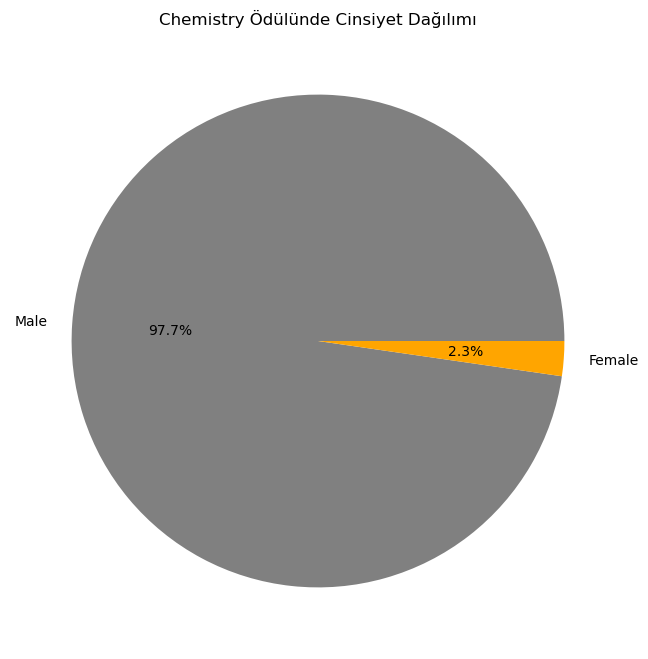

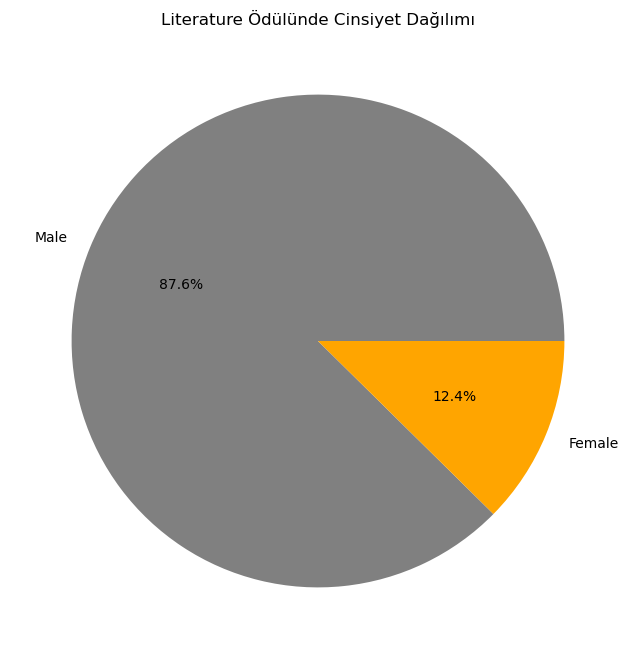

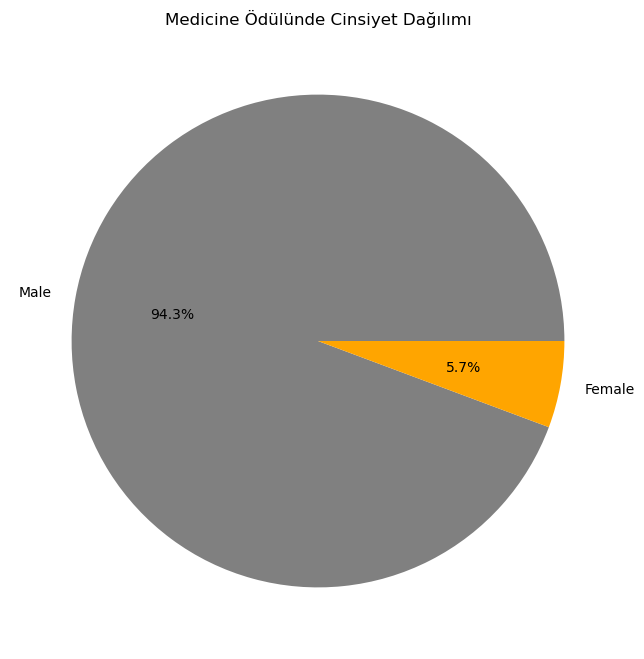

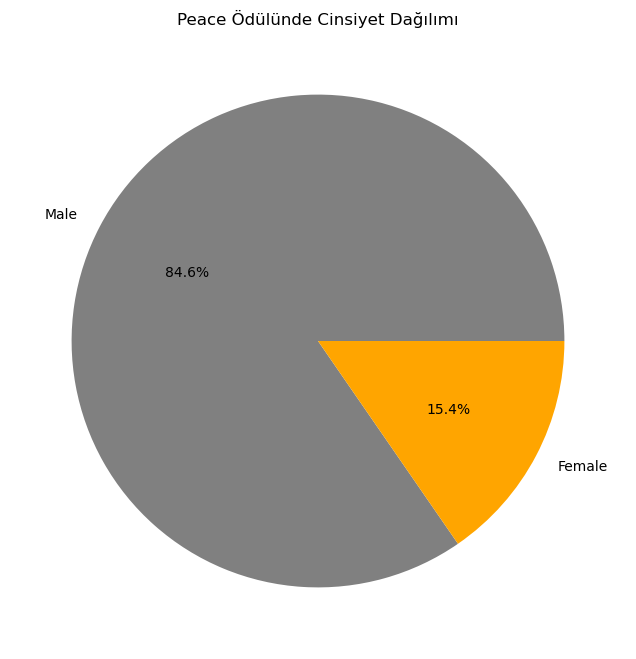

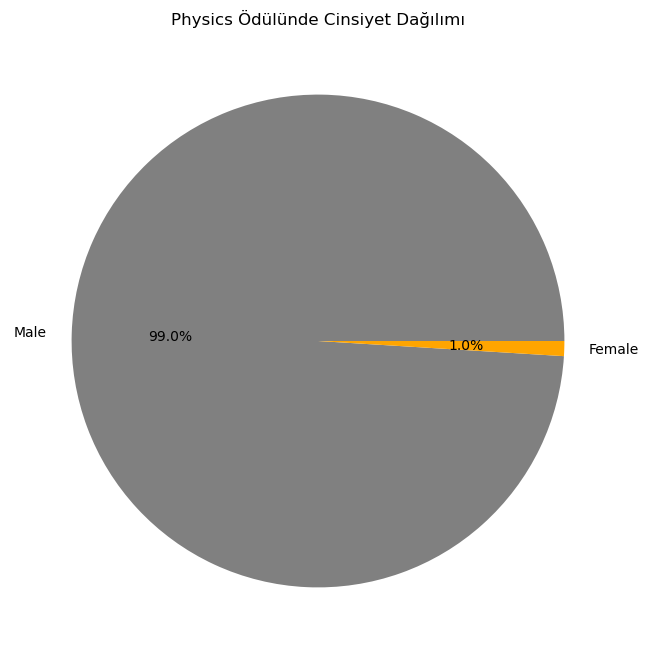

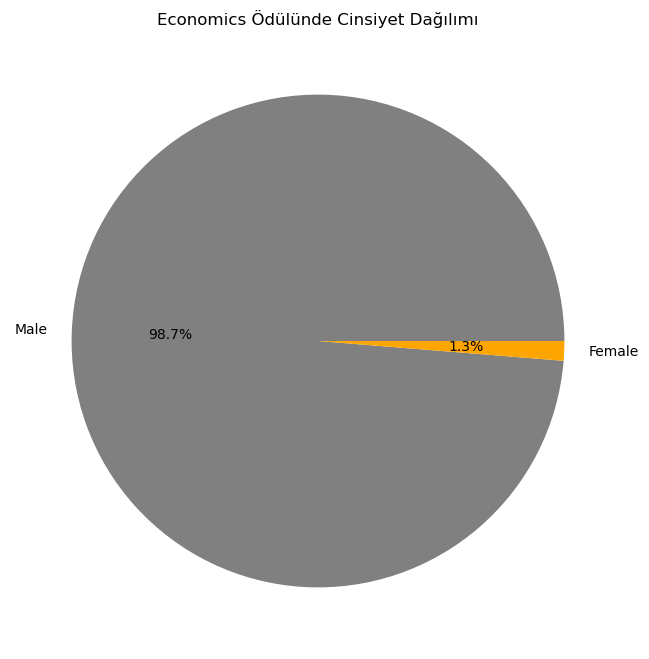

In [124]:
categories = df['category'].unique()

for category in categories:
    df_category = df[df['category'] == category]
    
    gender_counts = df_category['sex'].value_counts()

    # Pasta grafiği çizme
    palette = {'Male': 'gray', 'Female': 'orange'}
    plt.figure(figsize=(8, 8))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=[palette.get(x, 'gray') for x in gender_counts.index])
    plt.title(f'{category} Ödülünde Cinsiyet Dağılımı')
    plt.show()

Nobel ödüllerinin cinsiyete göre dağılımlarını kategori bazlı incelediğimizde tüm kategorilerde erkeklerin baskın olduğunu görmekteyiz. Altı kategori içerisinde sadece edebiyat ve barış kategorilerinde kadınların nispeten daha yüksek orana sahip olduğunu söyleyebiliriz.

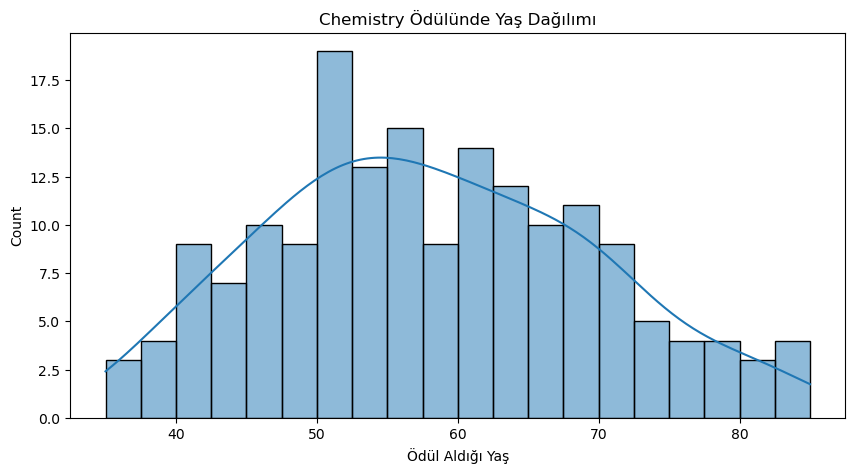

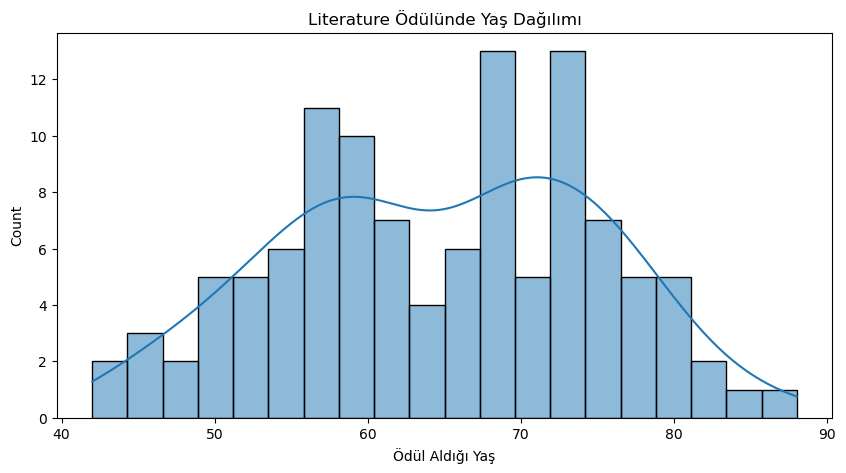

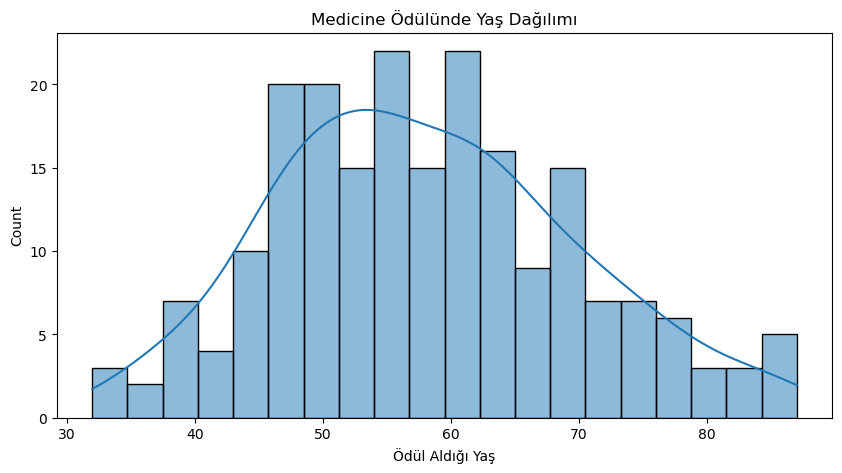

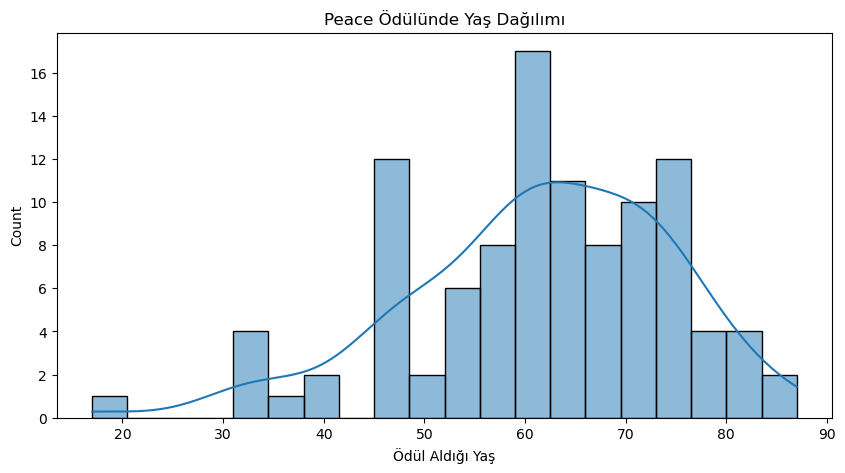

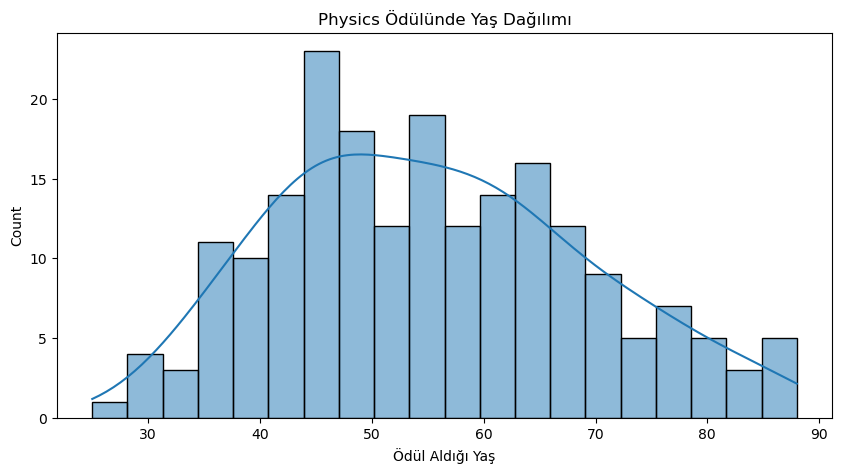

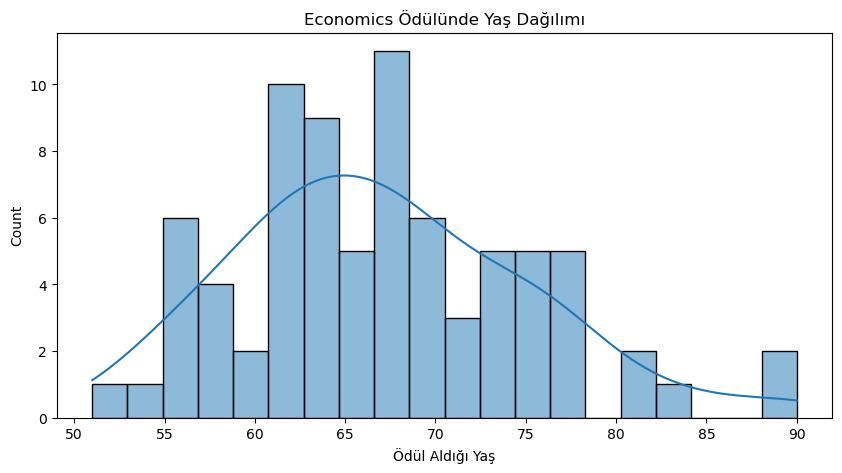

In [107]:
categories = df['category'].unique()

for category in categories:
    df_category = df[df['category'] == category]
      
    # Yaş dağılımı
    plt.figure(figsize=(10, 5))
    sns.histplot(df_category['age_at_award'], kde=True, bins=20)
    plt.title(f'{category} Ödülünde Yaş Dağılımı')
    plt.xlabel('Ödül Aldığı Yaş')
    plt.show()

Nobel ödüllerinin yaşa göre dağılımlarını kategori bazlı incelediğimizde Kimya kategorisinde 50-60 yaş arasının en yoğun olduğunu söyleyebiliriz.

Edebiyat kategorisini incelediğimizde 60'lı ve 70'li yaşlarda bir yoğunluk görülmektedir.

Tıp kategorisini incelediğimzde 45-65 yaş aralığında bir yoğunluk görülmektedir.

Barış kategorisini incelediğimzde 55-75 yaş aralığında bir yoğunluk görülmektedir.Bunun dışında 45-50 yaş arasında ciddi bir yoğunluk görülmektedir.

Fizik kategorisini incelediğimzde 45-65 yaş aralığında bir yoğunluk görülmektedir.

Ekonomi kategorisini incelediğimzde 60-70 yaş aralığında bir yoğunluk görülmektedir.

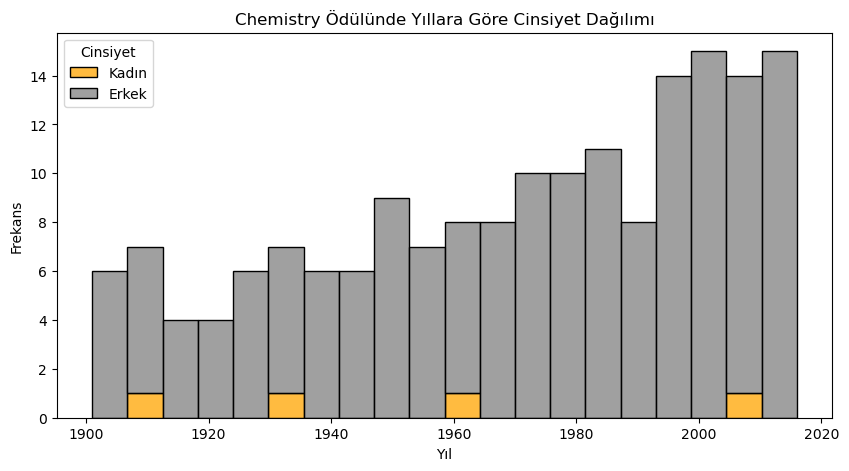

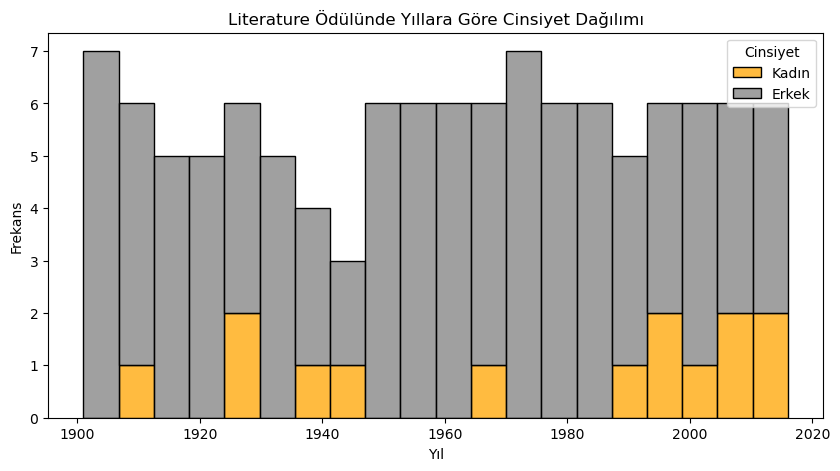

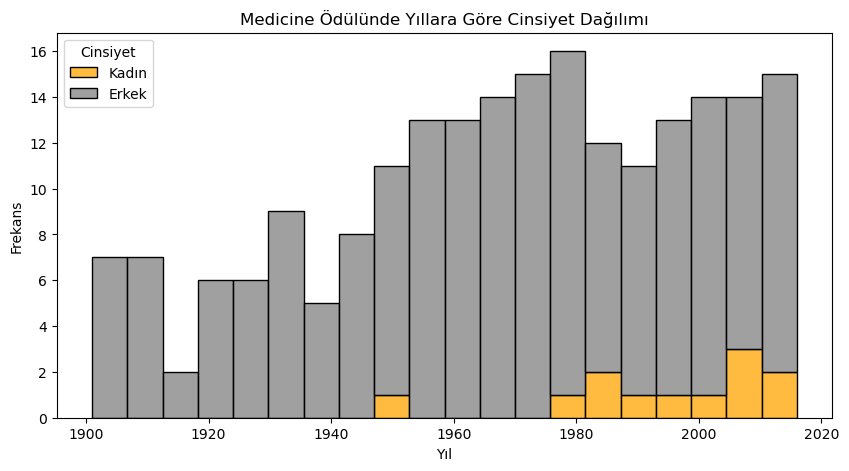

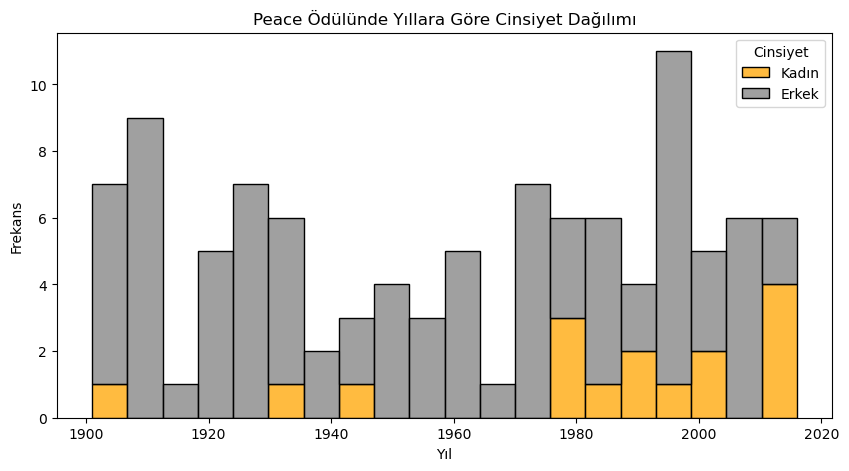

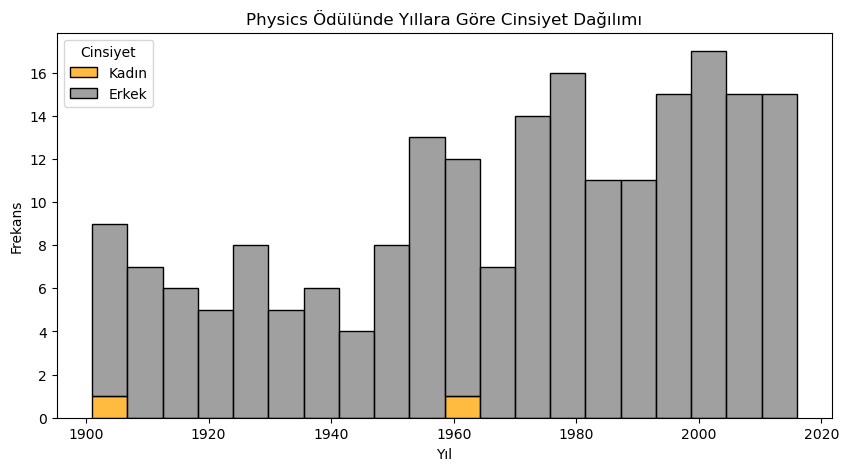

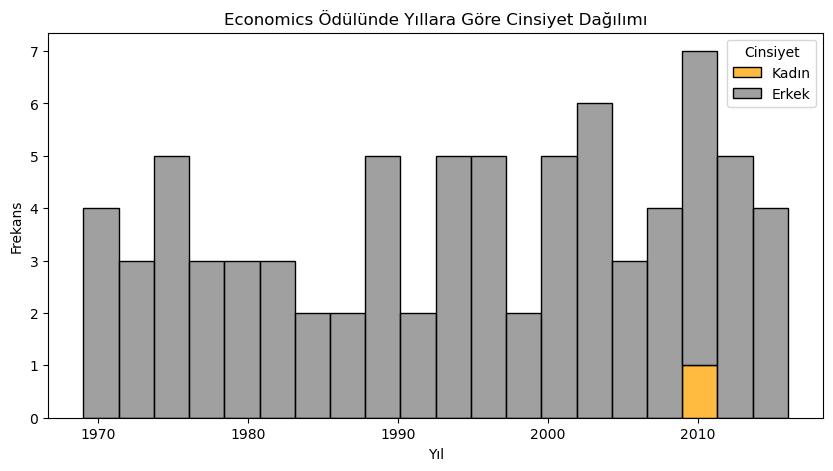

In [108]:
categories = df['category'].unique()

for category in categories:
    df_category = df[df['category'] == category]
    
    # Yıllara göre cinsiyet dağılımı
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_category, x='year', hue='sex', multiple='stack', bins=20, palette=palette)
    plt.title(f'{category} Ödülünde Yıllara Göre Cinsiyet Dağılımı')
    plt.xlabel('Yıl')
    plt.ylabel('Frekans')
    plt.legend(title='Cinsiyet', labels=['Kadın', 'Erkek'])
    plt.show()

Yıllar içerisinde cinsiyet dağılımları incelendiğinde Edebiyat ve Tıp kategorilerinde yaklaşık son 30 yılda kadınların hep ödül aldığı görülemktedir. Sayıca erkeklere göre çok az olmakla beraber diğer kategorilerde bu durum bile söz konusu değildir. Bunun dışında Barış kategorisinde de süreklilik olmasa da benzer bir durum söz konusudur.

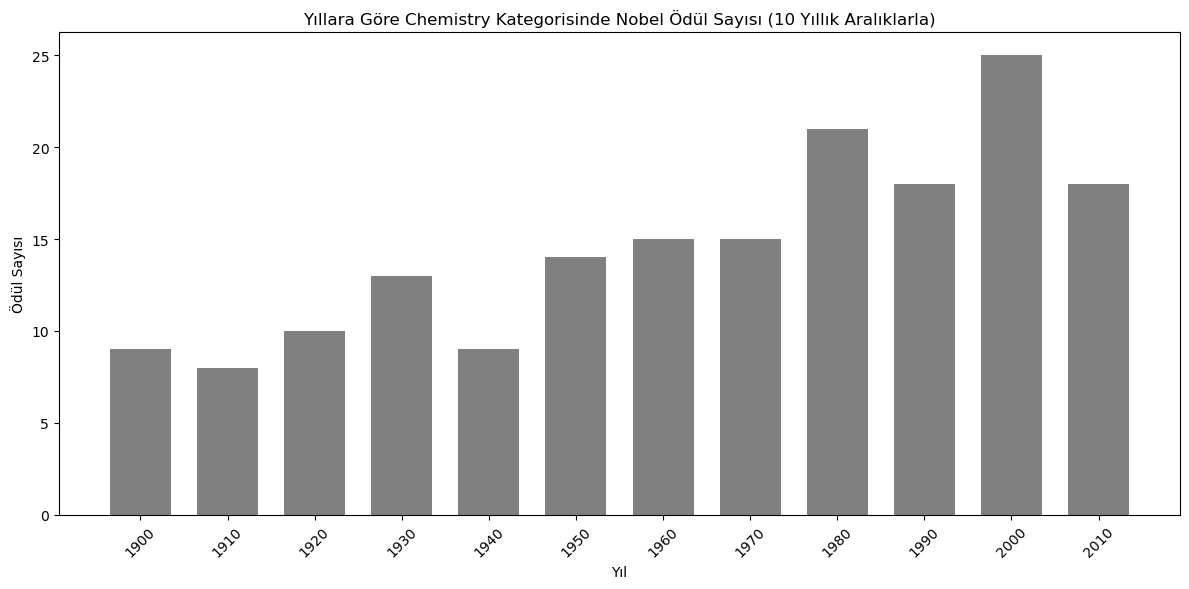

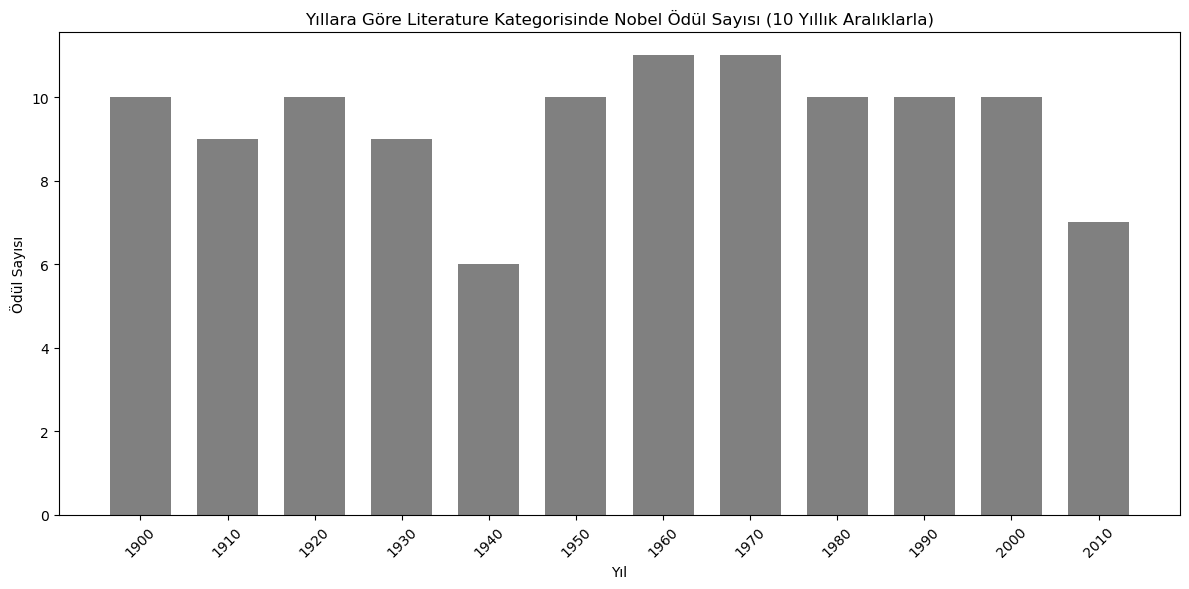

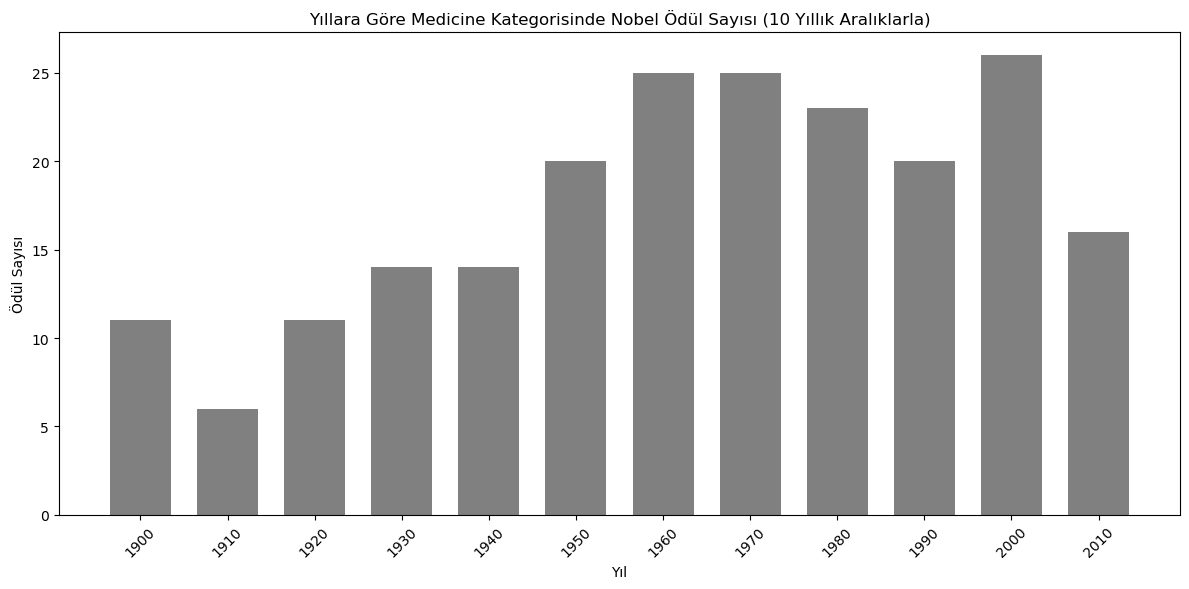

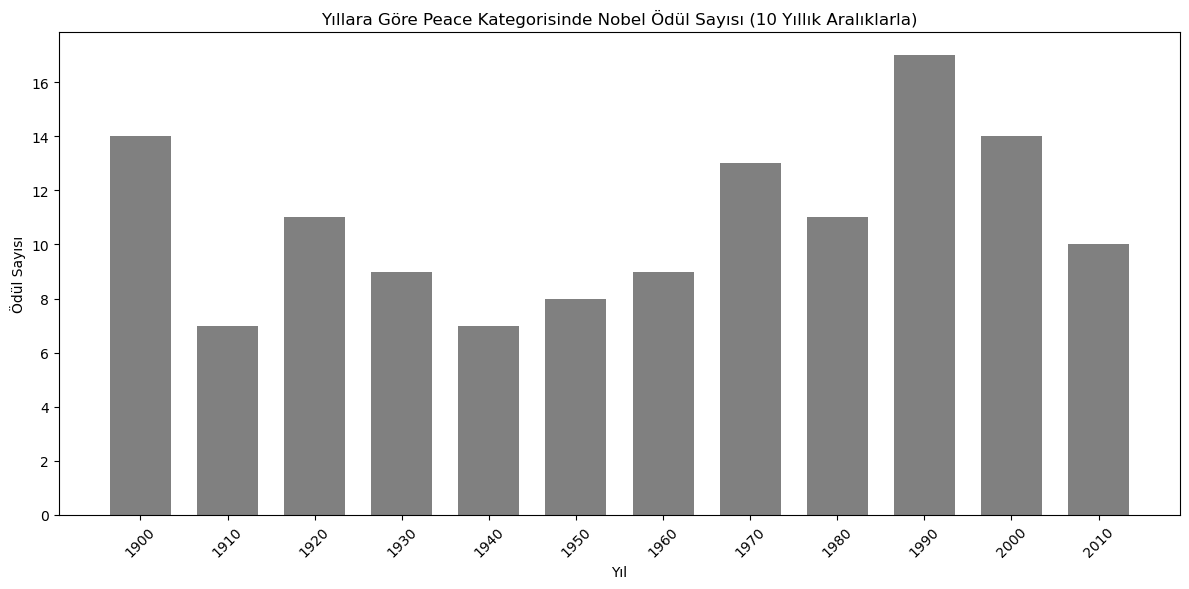

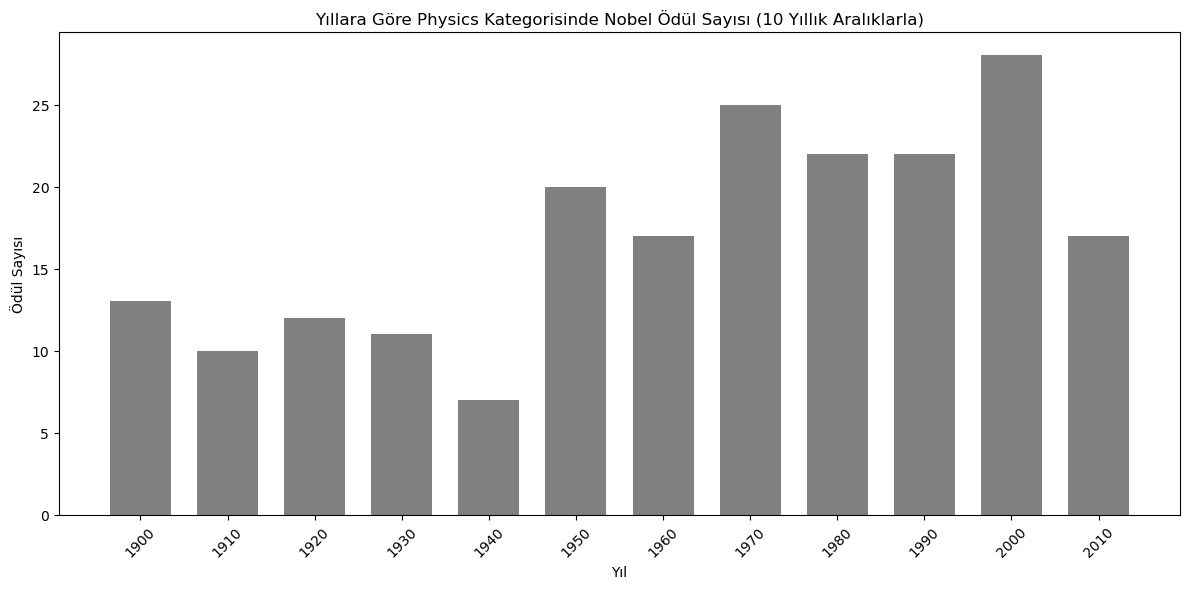

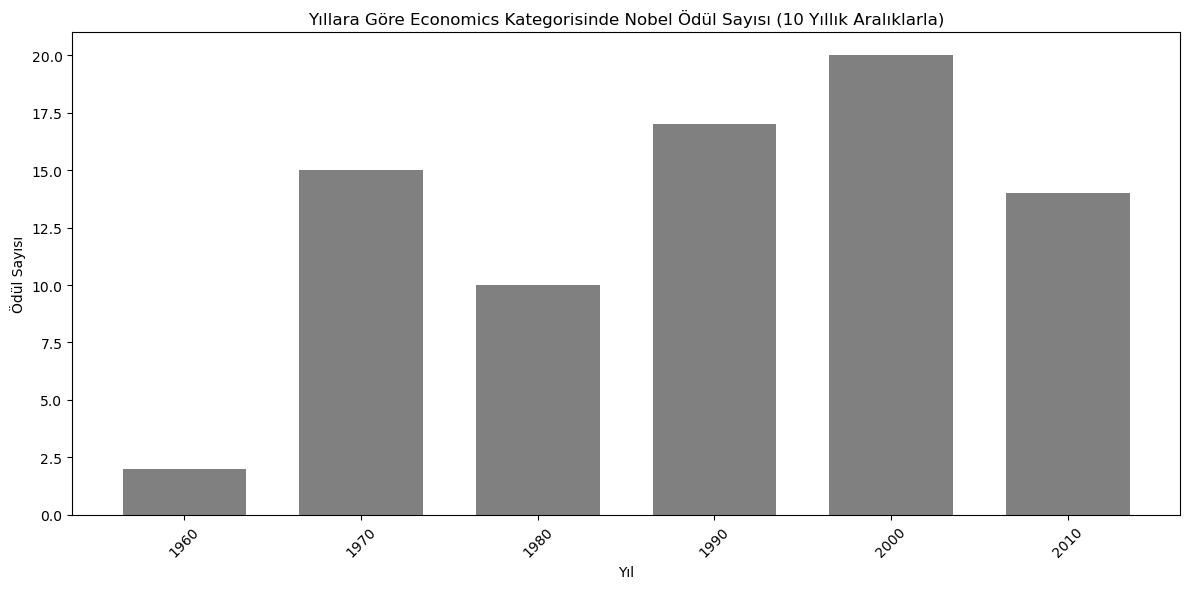

In [110]:
categories = df['category'].unique()

for category in categories:
    df_category = df[df['category'] == category]
    
    # Yıllara göre ödül sayısını hesaplama
    prize_counts = df_category.groupby('year').size().reset_index(name='prize_count')

    # 10 yıllık aralıklarla gruplama
    prize_counts['decade'] = (prize_counts['year'] // 10) * 10
    decade_counts = prize_counts.groupby('decade').sum().reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.bar(decade_counts['decade'], decade_counts['prize_count'], color='gray',width=7)
    plt.title(f'Yıllara Göre {category} Kategorisinde Nobel Ödül Sayısı (10 Yıllık Aralıklarla)')
    plt.xlabel('Yıl')
    plt.ylabel('Ödül Sayısı')
    plt.xticks(decade_counts['decade'], rotation=45)
    plt.tight_layout()
    plt.show()

Kimya kategorisinde en çok 2000’li yıllarda ödül alınmıştır.

Edebiyat kategorisinde baskın bir on yıl görülmemektedir.

Tıp kategorisinde en çok 2000’li yıllarda ödül alınmıştır. 1950'ler sonrasında genel bir artış görülmektedir.

Barış kategorisinde en çok 1990'lı yıllarda ödül alınmıştır.

Fizik kategorisinde en çok 2000’li yıllarda ödül alınmıştır. 1950'ler sonrasında genel bir artış görülmektedir.

Ekonomi nispeten yeni bir kategoridir. En çok 2000’li yılların başında ödül alınmıştır.

# **6. 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.**

In [111]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


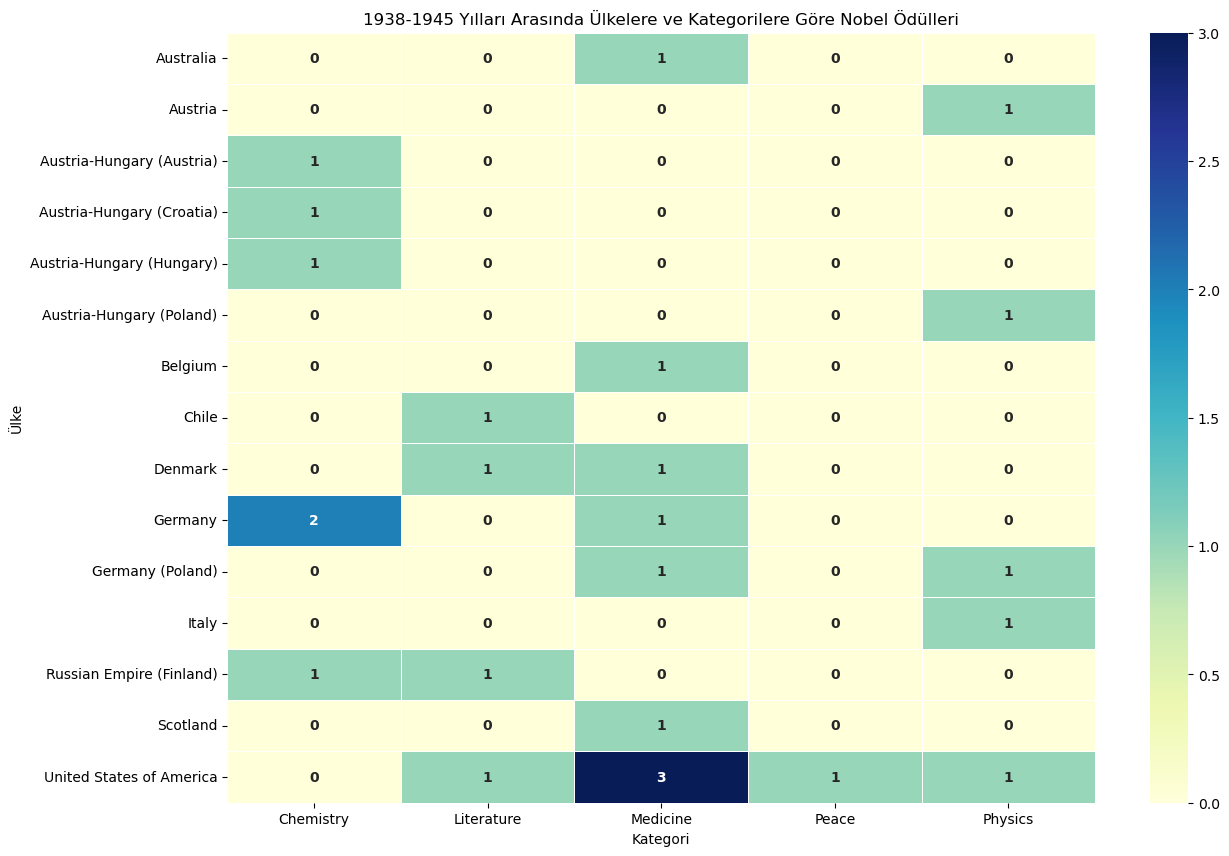

In [112]:
filtered_df = df[(df['year'] >= 1938) & (df['year'] <= 1945)]

# Ülke ve kategoriye göre ödüllerin sayısını hesaplama
country_category_count = filtered_df.groupby(['birth_country', 'category']).size().unstack(fill_value=0)

# Isı haritasını oluşturma
plt.figure(figsize=(14, 10))
sns.heatmap(country_category_count, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, annot_kws={"size": 10, "weight": 'bold'})
plt.title('1938-1945 Yılları Arasında Ülkelere ve Kategorilere Göre Nobel Ödülleri')
plt.xlabel('Kategori')
plt.ylabel('Ülke')
plt.show()


Isı grafiğinde gösterildiği gibi ABD, 1938–1945 yılları arasında tıp alanında 3 ödül alarak birinci olmuştur. Almanya kimya alanında 2 ödül alarak sıralamada ikinci olmuştur.
ABD bu yıllar arasında Kimya kategorisi hariç her kategoriden ödül almayı başarmıştır.

# **7.1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)**

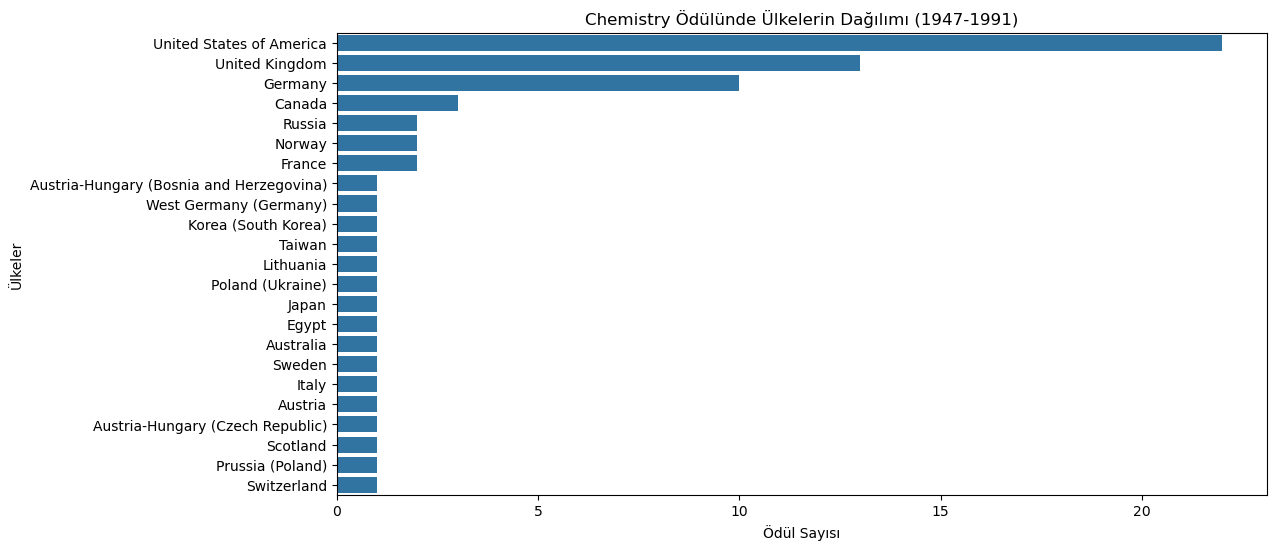

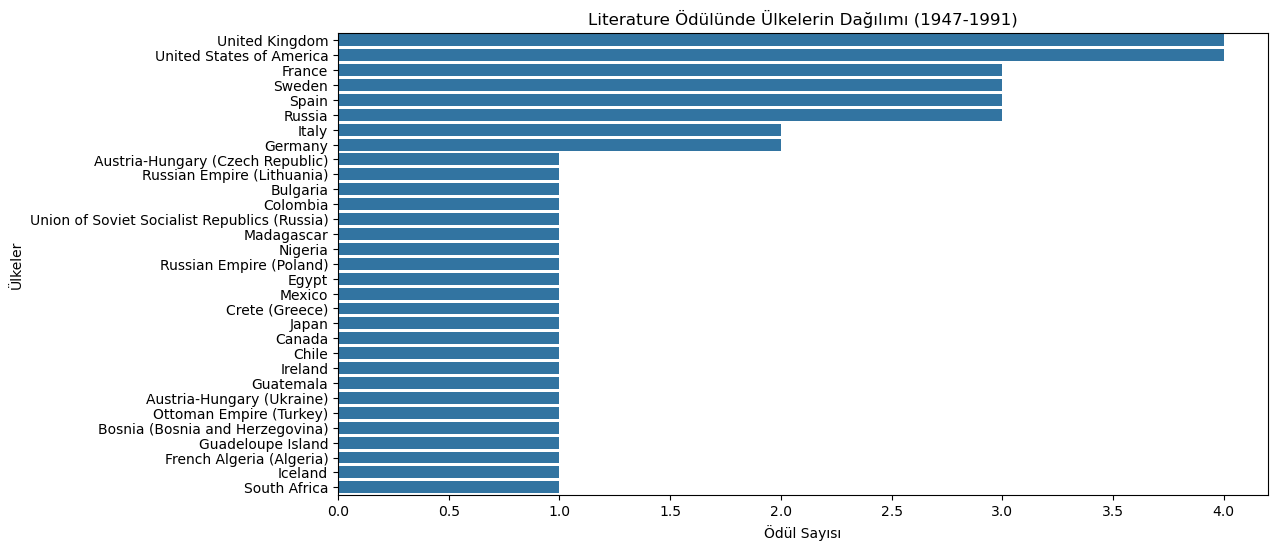

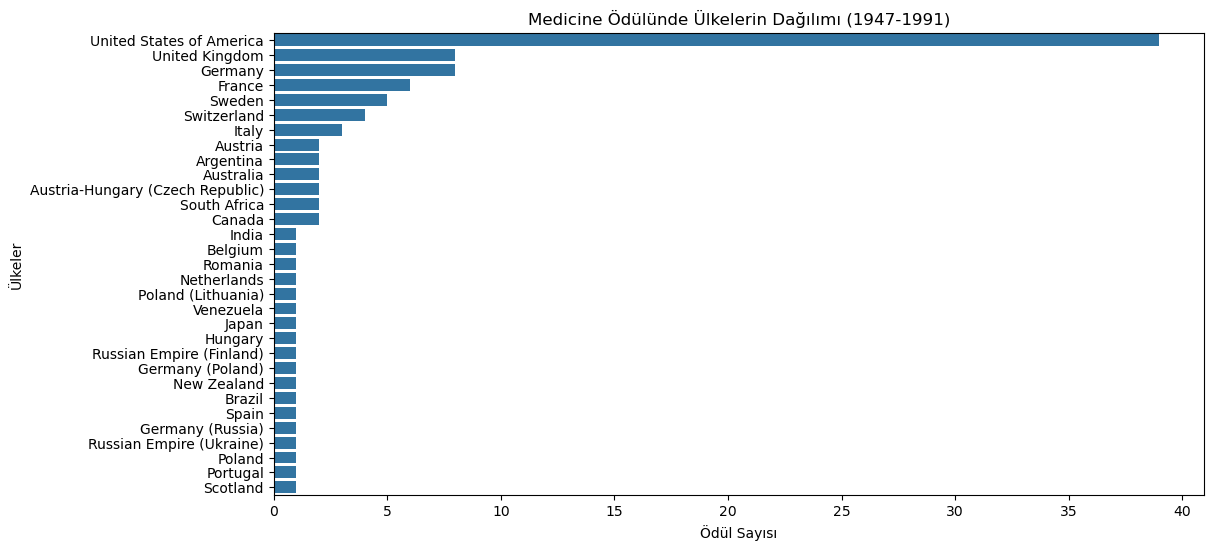

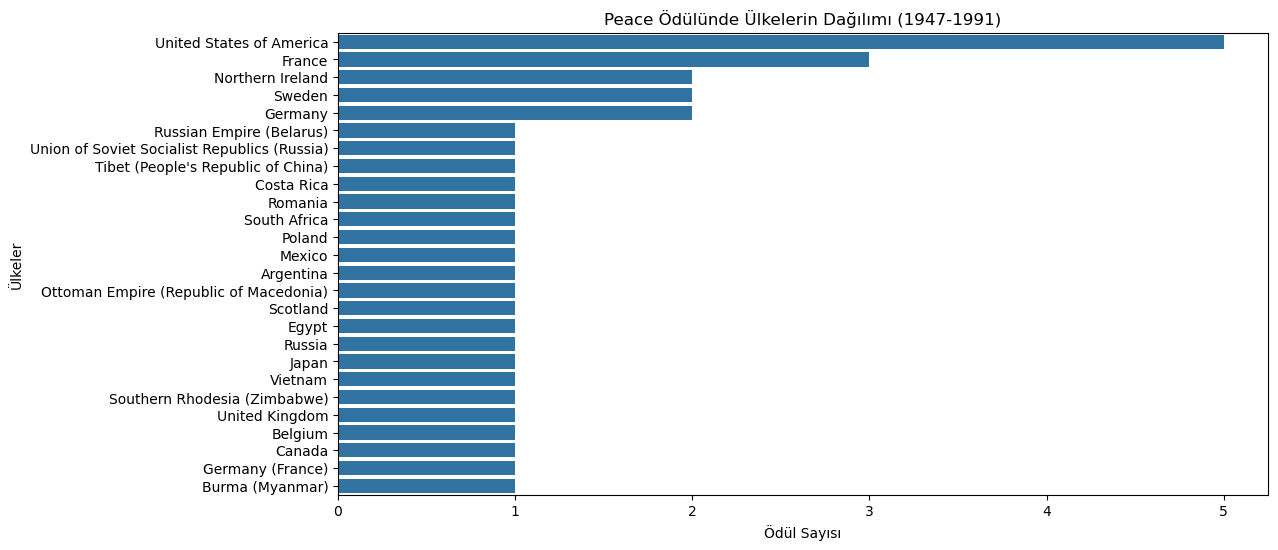

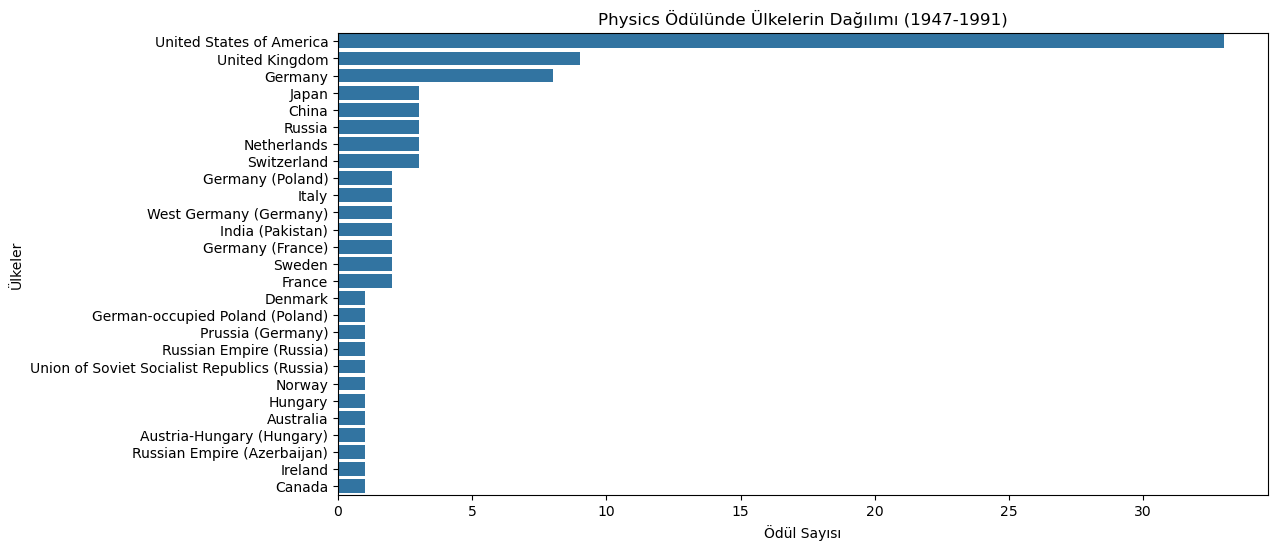

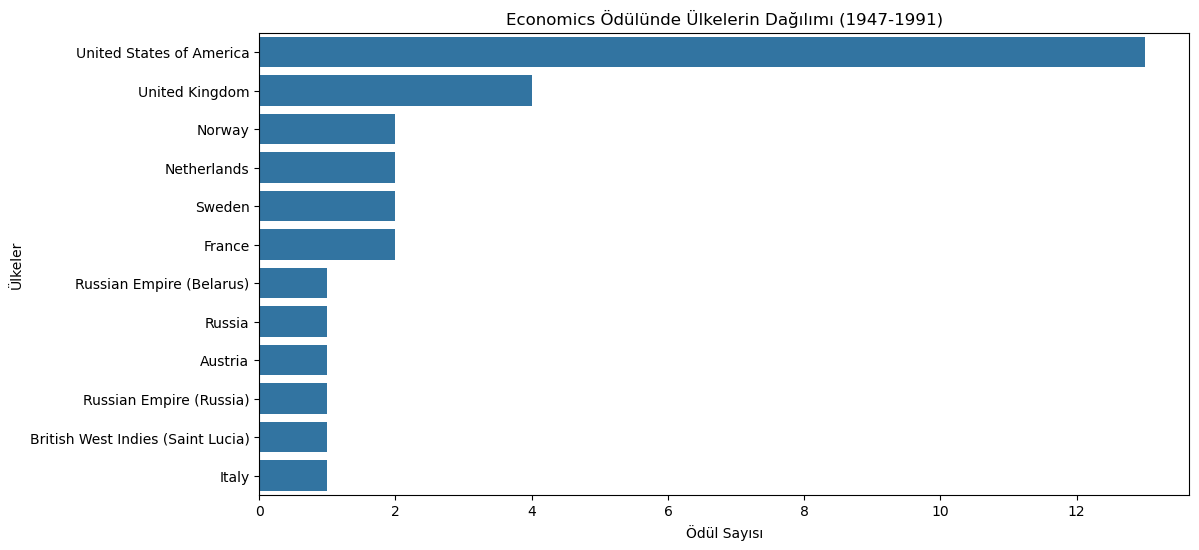

In [113]:
filtered_df = df[(df['year'] >= 1947) & (df['year'] <= 1991)]

categories = df['category'].unique()

for category in categories:
    df_category = filtered_df[filtered_df['category'] == category]

    plt.figure(figsize=(12, 6))
    sns.countplot(y='birth_country', data=df_category, order=df_category['birth_country'].value_counts().index)
    plt.title(f'{category} Ödülünde Ülkelerin Dağılımı (1947-1991)')
    plt.xlabel('Ödül Sayısı')
    plt.ylabel('Ülkeler')
    plt.show()


Kimya kategorisinde ABD, Birleşik Krallık ve Almanya en çok ödüle sahip ülkelerdir.

Edebiyat kategorisinde ABD, Birleşik Krallık en çok ödüle sahip ülkelerdir. Bu iki ülkeyi Fransa, İsveç, İspanya ve Rusya ikincilikle takip etmektedir. İtalya ve
Almanya ise üçüncü sıradadır.

Tıp kategorisinde ABD en çok ödüle sahiptir. Birleşik Krallık, Almanya ikinci sırayı paylaşmaktadır. Fransa ise üçüncü sıradadır.

Barış ödülü kategorisinde ABD en çok ödüle sahiptir. Fransa ikinci sıradadır. Kuzey İrlanda, İsveç ve Almanya üçüncülüğü paylaşmaktadır.

Fizik alanında ABD en çok ödülü alan ülkedir. ABD’yi Birleşik Krallık ve Almanya takip etmektedir.

Ekonomi alanında dünyanın en büyük kapitalist ülkesi olan ABD birinciliği almaktadır. ABD’yi İngiltere ikincilikle, Norveç, Hollanda, İsveç ve Fransa
üçüncülükle takip etmektedir.

# **8.Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.**

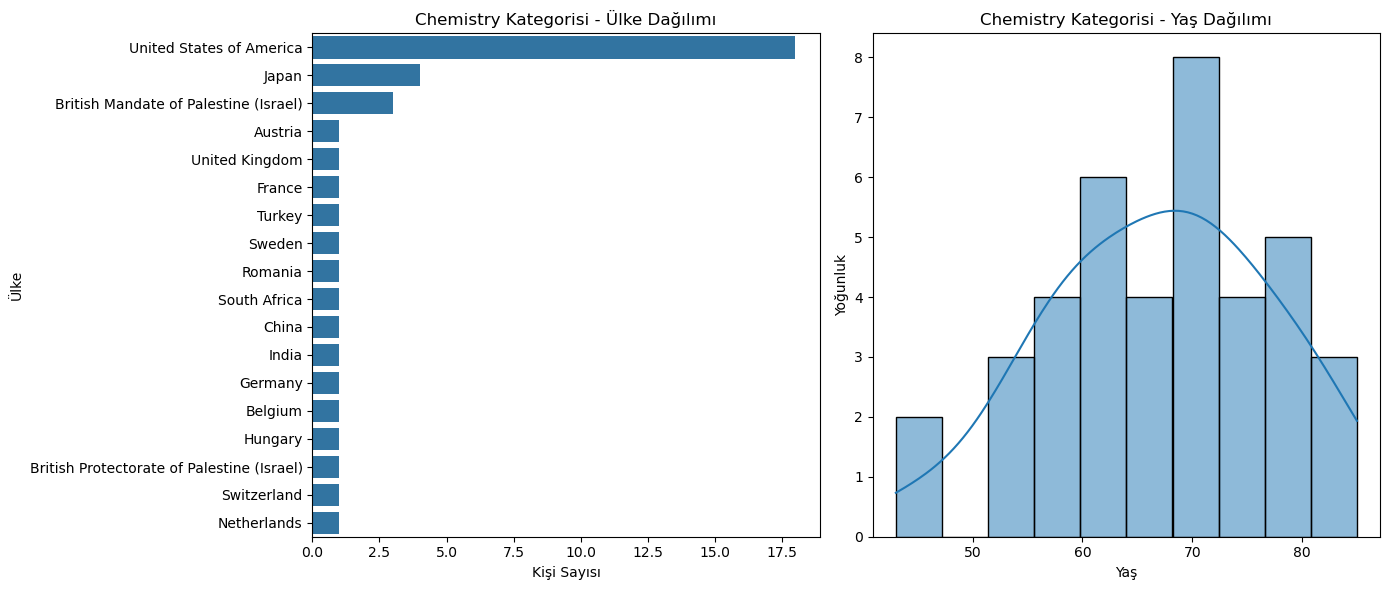

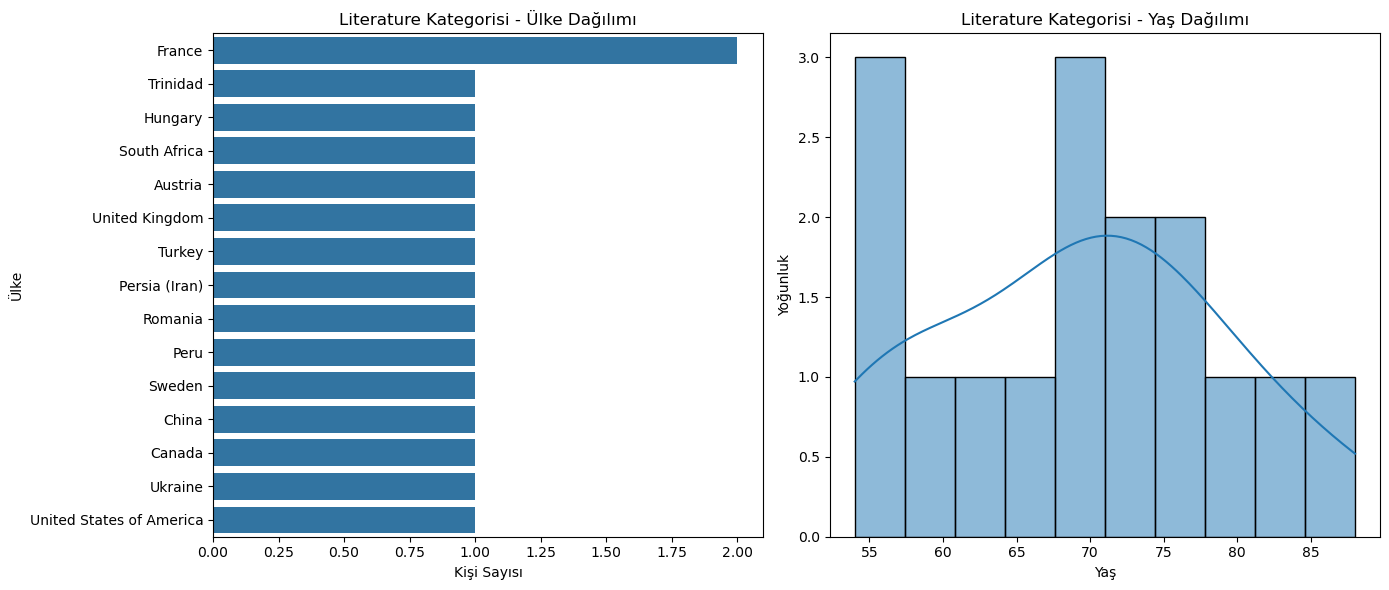

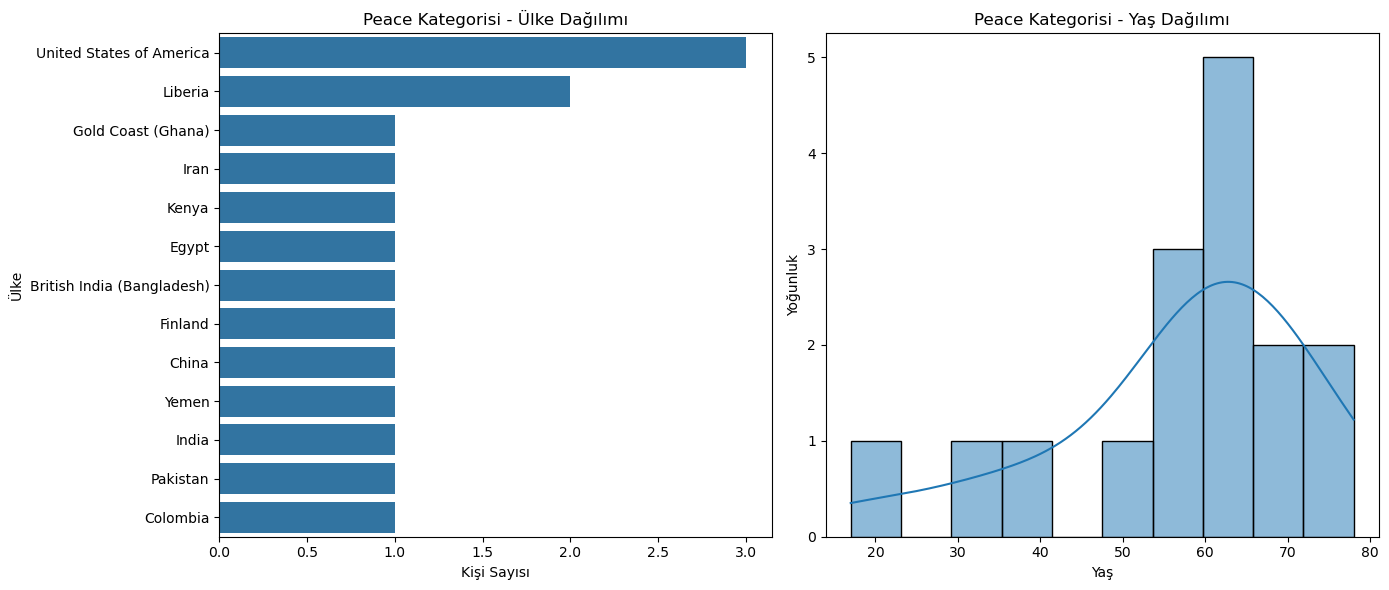

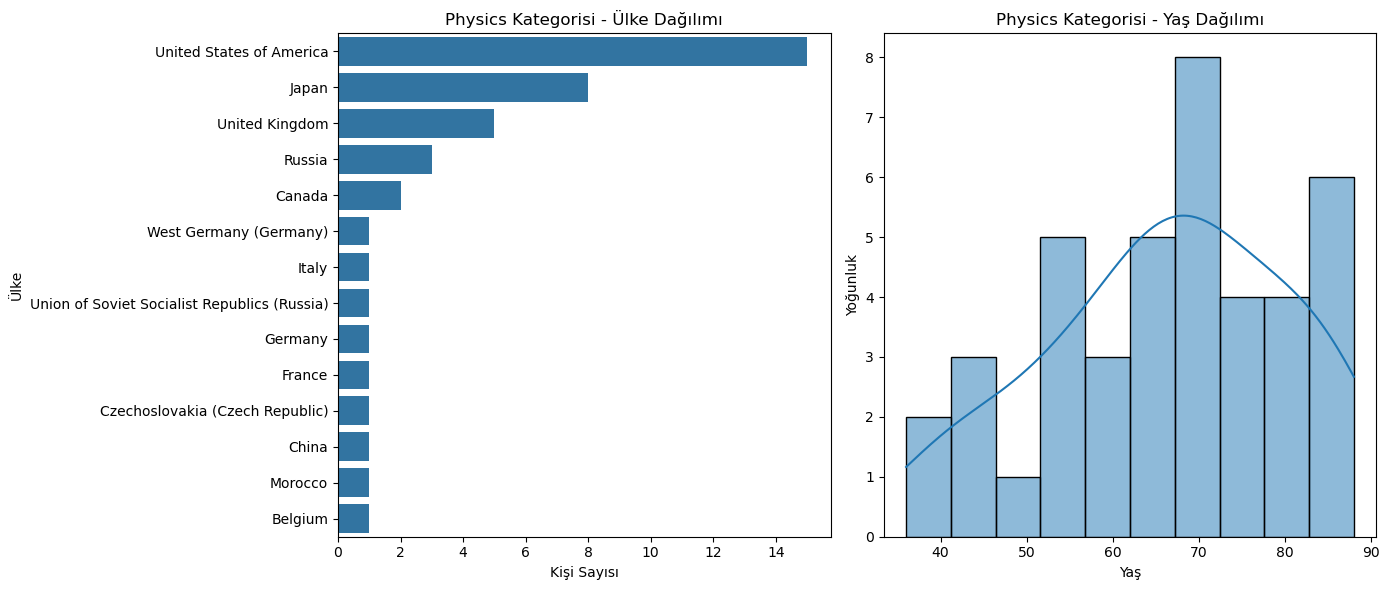

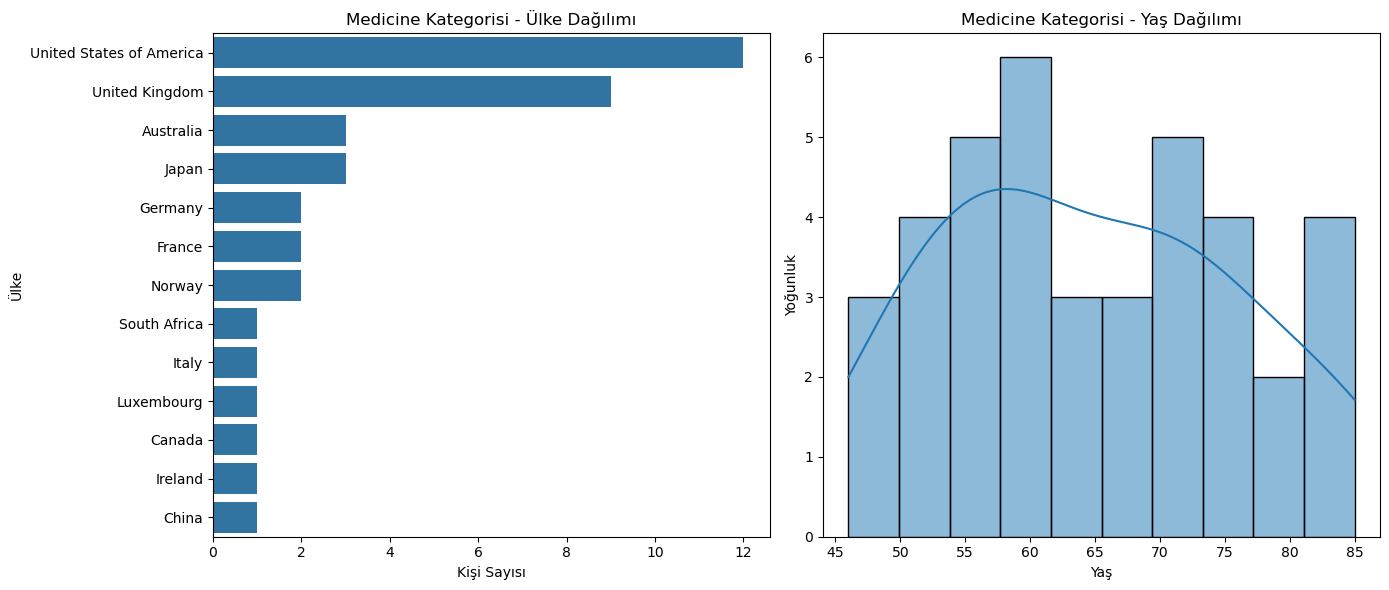

In [123]:
filtered_df = df[df['year'] > 2000]

categories = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine'] 

for category in categories:
    df_category = filtered_df[filtered_df['category'] == category]

    plt.figure(figsize=(14, 6))

    # İlk grafik: Ülkeler
    plt.subplot(1, 2, 1)
    sns.countplot(y='birth_country', data=df_category, order=df_category['birth_country'].value_counts().index)
    plt.title(f'{category} Kategorisi - Ülke Dağılımı')
    plt.xlabel('Kişi Sayısı')
    plt.ylabel('Ülke')

    # İkinci grafik: Yaş Dağılımı
    plt.subplot(1, 2, 2)
    sns.histplot(df_category['age_at_award'], bins=10, kde=True)
    plt.title(f'{category} Kategorisi - Yaş Dağılımı')
    plt.xlabel('Yaş')
    plt.ylabel('Yoğunluk')

    plt.tight_layout()
    plt.show()



Kimya kategorisinde ABD en çok ödül alan ülkedir. Bu kategoride 55-80 yaş aralığı yoğunluktadır. 
70’li yaşlada  ödül kazanan sayısı en yüksekti

Edebiyat kategorisinde gerçek bir birincikten söz etmek zordur. Ödül alan kişilere baktığımızda Fransa'dan 2 kişinin ödül aldığını görmekteyiz. 50-55 ve 70-80 yaş aralıklarında yoğunluk görülmektedir.

Barış ödülünde ABD birinci, Liberya ise ikinci sırada yer almaktadır. 55-75 yaş aralığında yoğunluk görülmektedir.

Fizik kategorisinde ABD'nin diğer ülkelere göre ciddi sayıda farkla ödül aldığını görmekteyiz. ABD'yi Japonya ve Birleşik Krallık takip etmekedir. 70'li yaşlarda en çok ödül alınmıştır.

Tıp kategorisinde ABD en çok ödül alan ülkedir. ABD'yi Birleşik Krallık takip etmektedir. Avustralya ve Japonya 
üçüncülüğü paylaşmaktadırEn çok 50–65 ve 70–80 yaş 
aralıklarındayoğunluk görülmektedir. ..